 ## Autofinanciamento de campanha nas eleições de 2020

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
receita_cand = pd.read_csv("C:/Users/mcaio/Desktop/Nova pasta/receitas_candidatos_2020_SP.csv",
                           delimiter = ";",
                           error_bad_lines=False ,
                           encoding = "ISO-8859-1")


In [5]:
candidatos_sp = pd.read_csv("C:/Users/mcaio/Desktop/Nova pasta/consulta_cand_2020_SP.csv",
                            delimiter = ";",
                            error_bad_lines = False,
                            encoding = "ISO-8859-1")


In [6]:

receita_cand["VR_RECEITA"] = receita_cand["VR_RECEITA"].replace(",", ".", regex = True)

receita_cand["VR_RECEITA"] = pd.to_numeric(receita_cand["VR_RECEITA"], downcast="float")

receita_cand = receita_cand[receita_cand["DS_ORIGEM_RECEITA"] == "Recursos próprios"]

In [7]:
receita_cand = receita_cand.groupby(["SQ_CANDIDATO"])["VR_RECEITA"].sum().reset_index().round(1)

In [8]:
receita_cand = receita_cand.sort_values(by = "VR_RECEITA", ascending = False)

In [9]:
tabela = receita_cand.merge(candidatos_sp, on = "SQ_CANDIDATO", how = 'left') 

In [10]:
tabela = tabela[["SQ_CANDIDATO", "NR_TURNO", "DS_CARGO", "NM_UE", "NM_URNA_CANDIDATO", "SG_PARTIDO", "VR_RECEITA"]]

In [11]:
tabela.tail(5)

,SQ_CANDIDATO,NR_TURNO,DS_CARGO,NM_UE,NM_URNA_CANDIDATO,SG_PARTIDO,VR_RECEITA
27979,250001255833,1,VEREADOR,ITATIBA,JOÃO ELETRICISTA,AVANTE,0.2
27980,250000974594,1,VEREADOR,IBIRAREMA,CIBELE VIEIRA,DEM,0.1
27981,250001084855,1,VEREADOR,FLOREAL,PAULINHO TESTA,DEM,0.1
27982,250001084862,1,VEREADOR,FLOREAL,MIGUELZÃO,DEM,0.1
27983,250001022277,1,VEREADOR,PARANAPANEMA,DRA LAIZ,REPUBLICANOS,0.0


In [12]:
tabela_mais = tabela[tabela["DS_CARGO"] == "VEREADOR"].head(10)

politico = tabela_mais[["NM_URNA_CANDIDATO"]]

dinheiro = tabela_mais[["VR_RECEITA"]]

In [18]:
tabela_mais.head(10)

,SQ_CANDIDATO,NR_TURNO,DS_CARGO,NM_UE,NM_URNA_CANDIDATO,SG_PARTIDO,VR_RECEITA
1,250001123285,1,VEREADOR,SÃO PAULO,ELISEU GABRIEL,PSB,343064.406250
2,250001016164,1,VEREADOR,SÃO PAULO,RODRIGO GOULART,PSD,321249.406250
3,250000919173,1,VEREADOR,SÃO PAULO,GILSON BARRETO,PSDB,300000.000000
5,250000919188,1,VEREADOR,SÃO PAULO,SANTIAGO,PSDB,275865.593750
6,250001088436,1,VEREADOR,SÃO PAULO,GEORGE HATO,MDB,249294.796875
9,250000919202,1,VEREADOR,SÃO PAULO,EDUARDO TUMA,PSDB,215000.000000
10,250000919186,1,VEREADOR,SÃO PAULO,AURÉLIO NOMURA,PSDB,213000.000000
12,250000811381,1,VEREADOR,SÃO PAULO,DR MILTON FERREIRA,PODE,200000.000000
15,250000754045,1,VEREADOR,SÃO PAULO,RINALDI DIGILIO,PSL,170000.000000
20,250000651052,1,VEREADOR,SÃO PAULO,ADILSON AMADEU,DEM,157506.406250


[Text(0, 0.5, 'Vereador'),
 Text(0.5, 0, 'Valor Gasto'),
 Text(0.5, 1.0, 'Vereadores que mais doaram a própria campanha em 2020')]

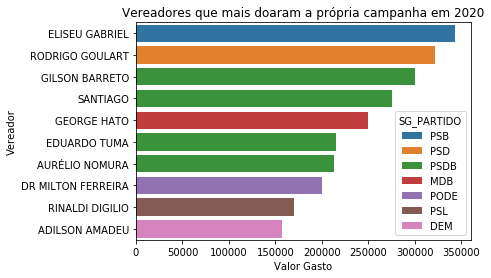

In [29]:
ax = sns.barplot(x="VR_RECEITA", y="NM_URNA_CANDIDATO", hue = "SG_PARTIDO",dodge = False, data=tabela_mais)

ax.set(title = "Vereadores que mais doaram a própria campanha em 2020", ylabel = "Vereador", xlabel = "Valor Gasto")